In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=UserWarning,message=".*ScriptRunContext.*")

In [3]:
# Load dataset
df = pd.read_csv("../pyy8/data/metadata.csv")

# Look at the first few rows
print(df.head())

# DataFrame dimensions
print("Shape:", df.shape)

# Data types
print(df.dtypes)

# Missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

  cord_uid                                  title  \
0   abc123         COVID-19 and its global impact   
1   def456         SARS-CoV-2 vaccine development   
2   ghi789     Pandemic preparedness and response   
3   jkl012          Long-term effects of COVID-19   
4   mno345  Machine learning in COVID-19 research   

                            doi publish_time         journal  \
0       10.1001/jama.2020.12345   2020-03-15            JAMA   
1  10.1016/j.vaccine.2020.54321   2021-06-01         Vaccine   
2                           NaN   2019-11-20          Nature   
3         10.1056/NEJMoa2029876   2021-09-10            NEJM   
4                           NaN   2020-05-25  AI in Medicine   

                                            abstract             authors  \
0  This paper discusses the global impact of COVI...      Smith J; Doe A   
1  An overview of vaccine development strategies ...      Lee B; Kumar C   
2  This study analyzes preparedness for pandemics...     Wang X; Pat

In [4]:
# Drop rows with missing titles
df = df.dropna(subset=["title"])

# Convert date column
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year
df['year'] = df['publish_time'].dt.year

# Abstract word count
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))

df.head()

,cord_uid,title,doi,publish_time,journal,abstract,authors,url,year,abstract_word_count
0,abc123,COVID-19 and its global impact,10.1001/jama.2020.12345,2020-03-15,JAMA,This paper discusses the global impact of COVI...,Smith J; Doe A,https://doi.org/10.1001/jama.2020.12345,2020,8
1,def456,SARS-CoV-2 vaccine development,10.1016/j.vaccine.2020.54321,2021-06-01,Vaccine,An overview of vaccine development strategies ...,Lee B; Kumar C,https://doi.org/10.1016/j.vaccine.2020.54321,2021,8
2,ghi789,Pandemic preparedness and response,NaN,2019-11-20,Nature,This study analyzes preparedness for pandemics...,Wang X; Patel Y,https://www.nature.com/articles/xyz,2019,6
3,jkl012,Long-term effects of COVID-19,10.1056/NEJMoa2029876,2021-09-10,NEJM,Research on long-term health effects caused by...,Brown P; Garcia M,https://doi.org/10.1056/NEJMoa2029876,2021,8
4,mno345,Machine learning in COVID-19 research,NaN,2020-05-25,AI in Medicine,Applications of machine learning in analyzing ...,Johnson T; Singh R,https://aijournal.org/covid19-ml,2020,8


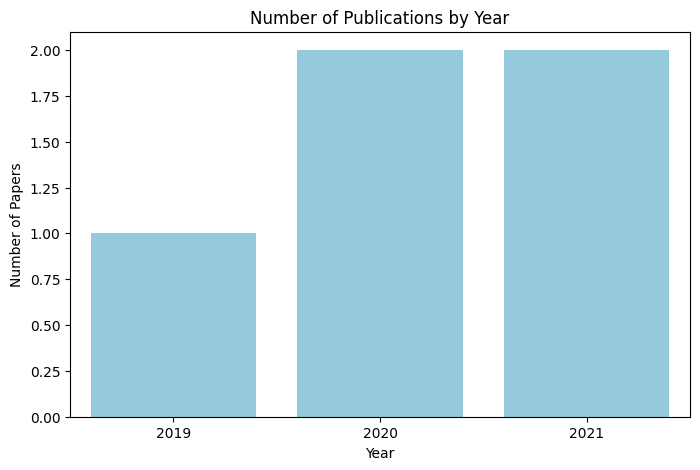

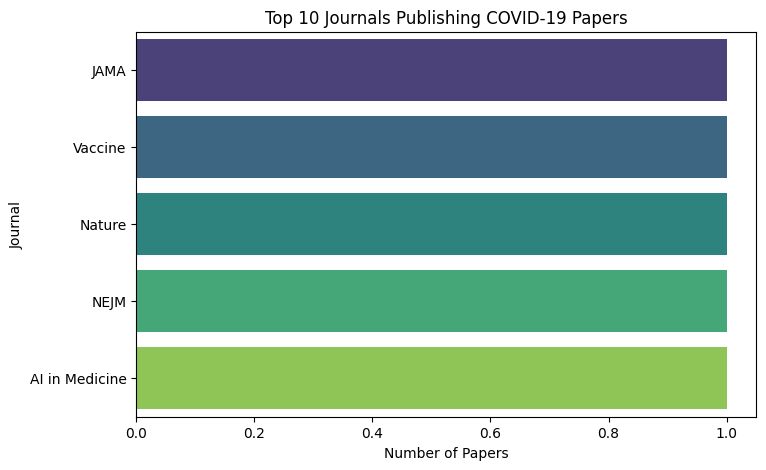

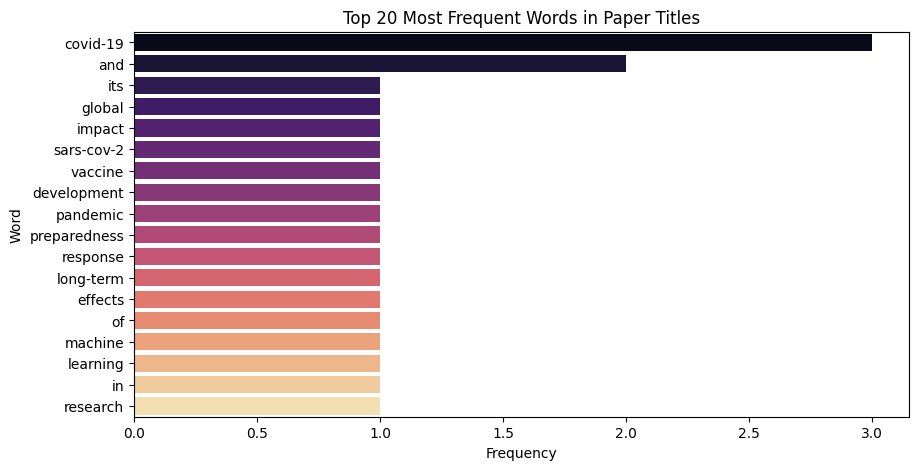

In [5]:
# Papers per year
papers_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=papers_per_year.index, y=papers_per_year.values, color="skyblue")
plt.title("Number of Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

# Top journals
top_journals = df['journal'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="viridis")
plt.title("Top 10 Journals Publishing COVID-19 Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()

# Most frequent words in titles (top 20)
all_titles = " ".join(df['title'].dropna()).lower().split()
word_freq = Counter(all_titles)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette="magma")
plt.title("Top 20 Most Frequent Words in Paper Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [6]:
StreamlitPatcher().jupyter()
year_range = st.slider("Select year range:", 2015, 2023, (2019, 2021))
st.title("CORD-19 Data Explorer")
st.write("Interactive exploration of COVID-19 research papers")

# Year filter
year_range = st.slider("Select year range:", 2015, 2023, (2019, 2021))
filtered = df[(df['year'] >= year_range[0]) & (df['year'] <= year_range[1])]

st.write(f"Showing {len(filtered)} papers between {year_range[0]} and {year_range[1]}")
st.dataframe(filtered[['title', 'authors', 'journal', 'year']].head(20))

# Visualization example
papers_per_year = filtered['year'].value_counts().sort_index()
st.bar_chart(papers_per_year)

NameError: name 'StreamlitPatcher' is not defined